In [30]:
import sqlite3
import pandas as pd
import numpy as np
# 连接到数据库文件
conn = sqlite3.connect("../pokemmo.sqlite")
# 创建游标对象
cursor = conn.cursor()

In [31]:
# 执行查询语句
query = """
SELECT x_coords,y_coords,map_number_tuple FROM general_status
where map_number_tuple = '(2, 1, 151)'

"""
cursor.execute(query)

# 获取查询结果
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['x_coords', 'y_coords', 'map_number_tuple'])
df.head()



,x_coords,y_coords,map_number_tuple
0,7,19,"(2, 1, 151)"
1,7,18,"(2, 1, 151)"
2,7,17,"(2, 1, 151)"
3,7,16,"(2, 1, 151)"
4,7,15,"(2, 1, 151)"


In [32]:
numeric_cols = ['x_coords', 'y_coords', 'map_number_tuple']
statistics = df[numeric_cols].describe()
print(statistics)

         x_coords    y_coords
count  356.000000  356.000000
mean     5.966292   13.786517
std      2.769856    3.200253
min      1.000000    6.000000
25%      4.000000   12.000000
50%      7.000000   14.000000
75%      7.000000   16.000000
max     13.000000   20.000000


增加offset

In [33]:
df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']
#df['new_x'] = df.apply(lambda row: row['x_coords'] -21 if row['map_num_3'] == 74 else row['x_coords'], axis=1)
#df['new_y'] = df.apply(lambda row: row['y_coords'] +40 if row['map_number_tuple'] == '(0, 23, 3)' else row['y_coords'], axis=1)

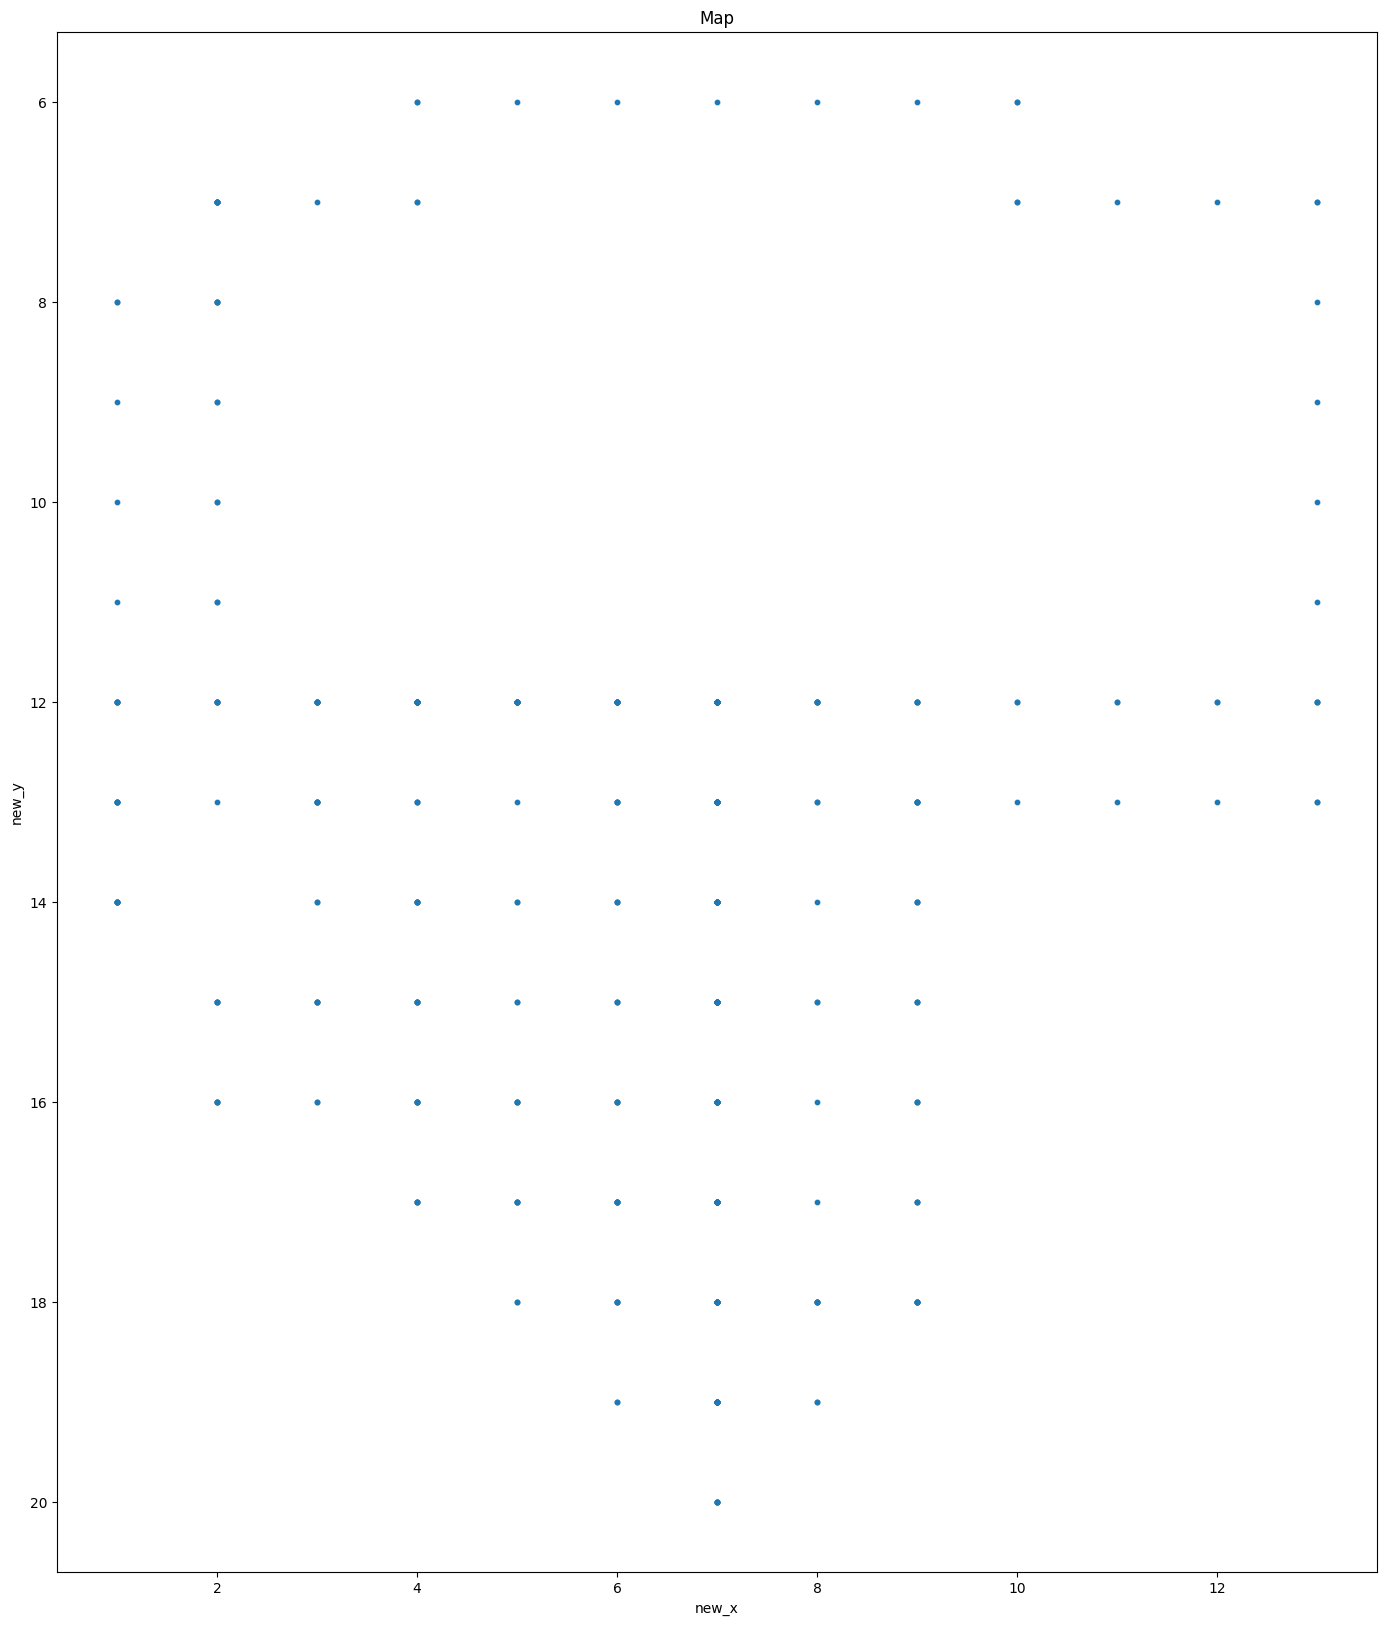

In [34]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(20, 20))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df['new_x'], df['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [35]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 4

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("../asserts/coords_tracking/Unova PC coordinates.xlsx")

In [36]:
import sqlite3
import pandas as pd
import numpy as np
df=pd.read_excel("../asserts/coords_tracking/Unova PC coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df

,index,1,2,3,4,5,6,7,8,9,10,11,12,13
0,6,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
1,7,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0
2,8,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,9,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,10,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
5,11,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
6,12,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
7,13,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
8,14,4.0,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
9,15,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN


In [37]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,6,1,NaN
1,7,1,NaN
2,8,1,4.0
3,9,1,4.0
4,10,1,4.0
...,...,...,...
190,16,13,NaN
191,17,13,NaN
192,18,13,NaN
193,19,13,NaN


In [38]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted

,y_coords,x_coords,mark
0,6,1,NaN
1,7,1,NaN
2,8,1,4.0
3,9,1,4.0
4,10,1,4.0
...,...,...,...
190,16,13,NaN
191,17,13,NaN
192,18,13,NaN
193,19,13,NaN


In [39]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
2,8,1,4.0
3,9,1,4.0
4,10,1,4.0
5,11,1,4.0
6,12,1,4.0
...,...,...,...
183,9,13,4.0
184,10,13,4.0
185,11,13,4.0
186,12,13,4.0


In [40]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

    y_coords x_coords  mark
0          8        1     4
1          9        1     4
2         10        1     4
3         11        1     4
4         12        1     4
..       ...      ...   ...
86         9       13     4
87        10       13     4
88        11       13     4
89        12       13     4
90        13       13     4

[91 rows x 3 columns]


In [41]:
df_melted.to_csv('../asserts/coords_tracking/Unova_PC_coords_tracking.csv')

In [8]:
# 关闭游标和连接
cursor.close()
conn.close()

NameError: name 'cursor' is not defined